# t-SNE cluster analysis

In [ ]:
from open_file import load_feature, get_layers
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# Model: trained using seen instruction via flow-matching loss

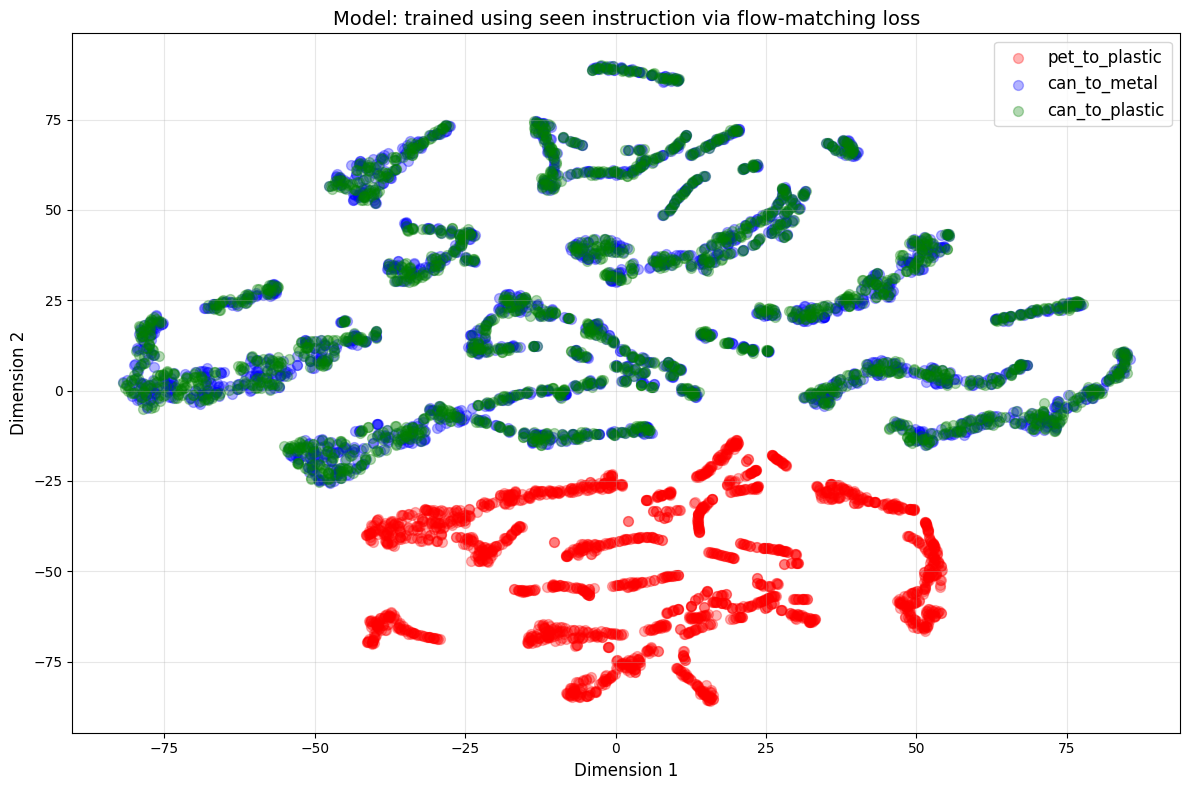

In [ ]:
layer = "action_head.vl_self_attention.layer_3_step_0"

after_pickup_can_pnp_can_to_metal = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_fusion_action_head_single_vl_feature_fm_loss_only-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_red_can_pnp_can_to_metal.hdf5", 
    layer)
after_pickup_can_pnp_can_to_plastic = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_fusion_action_head_single_vl_feature_fm_loss_only-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_red_can_pnp_can_to_plastic.hdf5", 
    layer)

after_pickup_pet_pnp_pet_to_plastic = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_fusion_action_head_single_vl_feature_fm_loss_only-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_green_PET_pnp_pet_to_plastic.hdf5",
    layer
)


after_pickup_pet_pnp_pet_to_plastic = after_pickup_pet_pnp_pet_to_plastic[:, -1, :]
after_pickup_can_pnp_can_to_metal = after_pickup_can_pnp_can_to_metal[:, -1, :]
after_pickup_can_pnp_can_to_plastic = after_pickup_can_pnp_can_to_plastic[:, -1, :]

print("Loaded features")
print("Start t-SNE visualization")

# 1. 데이터 합치기
data = np.vstack([
    after_pickup_pet_pnp_pet_to_plastic,
    after_pickup_can_pnp_can_to_metal,
    after_pickup_can_pnp_can_to_plastic
])

# 2. 라벨 생성 (색상 구분용)
labels = np.array(
    ['pet_to_plastic'] * len(after_pickup_pet_pnp_pet_to_plastic) +
    ['can_to_metal'] * len(after_pickup_can_pnp_can_to_metal) +
    ['can_to_plastic'] * len(after_pickup_can_pnp_can_to_plastic)
)

# 3. 차원 축소 (방법 선택)
# 방법 A: t-SNE
reducer = TSNE(n_components=2, random_state=42, perplexity=30)
# 방법 B: UMAP (더 빠름)
# reducer = UMAP(n_components=2, random_state=42)
# 방법 C: PCA (가장 빠름)
# reducer = PCA(n_components=2)

embedded = reducer.fit_transform(data)

# 4. 시각화
plt.figure(figsize=(12, 8))
colors = {'pet_to_plastic': 'red', 'can_to_metal': 'blue', 'can_to_plastic': 'green'}

for label, color in colors.items():
    mask = labels == label
    plt.scatter(
        embedded[mask, 0], 
        embedded[mask, 1], 
        c=color, 
        label=label, 
        alpha=0.3, 
        s=50
    )

plt.legend(fontsize=12)
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)
plt.title('Model: trained using seen instruction via flow-matching loss', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Model: trained using seen+unseen instruction via flow-matching loss

Loaded features
Start t-SNE visualization


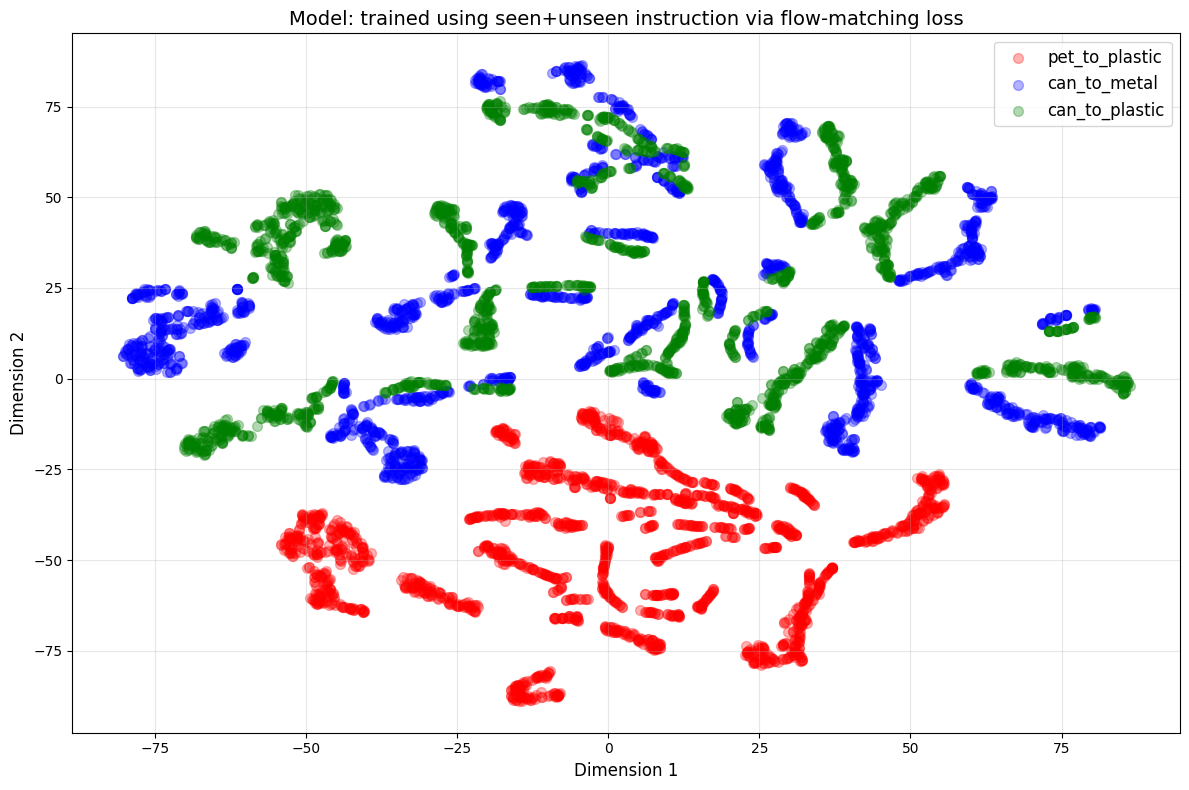

In [15]:
layer = "action_head.vl_self_attention.layer_3_step_0"

after_pickup_can_pnp_can_to_metal = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_unseen_fusion_action_head_single_vl_feature_fm_loss_only-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_red_can_pnp_can_to_metal.hdf5", 
    layer)
after_pickup_can_pnp_can_to_plastic = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_unseen_fusion_action_head_single_vl_feature_fm_loss_only-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_red_can_pnp_can_to_plastic.hdf5", 
    layer)

after_pickup_pet_pnp_pet_to_plastic = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_unseen_fusion_action_head_single_vl_feature_fm_loss_only-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_green_PET_pnp_pet_to_plastic.hdf5",
    layer
)


after_pickup_pet_pnp_pet_to_plastic = after_pickup_pet_pnp_pet_to_plastic[:, -1, :]
after_pickup_can_pnp_can_to_metal = after_pickup_can_pnp_can_to_metal[:, -1, :]
after_pickup_can_pnp_can_to_plastic = after_pickup_can_pnp_can_to_plastic[:, -1, :]

print("Loaded features")
print("Start t-SNE visualization")

# 1. 데이터 합치기
data = np.vstack([
    after_pickup_pet_pnp_pet_to_plastic,
    after_pickup_can_pnp_can_to_metal,
    after_pickup_can_pnp_can_to_plastic
])

# 2. 라벨 생성 (색상 구분용)
labels = np.array(
    ['pet_to_plastic'] * len(after_pickup_pet_pnp_pet_to_plastic) +
    ['can_to_metal'] * len(after_pickup_can_pnp_can_to_metal) +
    ['can_to_plastic'] * len(after_pickup_can_pnp_can_to_plastic)
)

# 3. 차원 축소 (방법 선택)
# 방법 A: t-SNE
reducer = TSNE(n_components=2, random_state=42, perplexity=30)
# 방법 B: UMAP (더 빠름)
# reducer = UMAP(n_components=2, random_state=42)
# 방법 C: PCA (가장 빠름)
# reducer = PCA(n_components=2)

embedded = reducer.fit_transform(data)

# 4. 시각화
plt.figure(figsize=(12, 8))
colors = {'pet_to_plastic': 'red', 'can_to_metal': 'blue', 'can_to_plastic': 'green'}

for label, color in colors.items():
    mask = labels == label
    plt.scatter(
        embedded[mask, 0], 
        embedded[mask, 1], 
        c=color, 
        label=label, 
        alpha=0.3, 
        s=50
    )

plt.legend(fontsize=12)
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)
plt.title('Model: trained using seen+unseen instruction via flow-matching loss', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Loaded features
Start t-SNE visualization


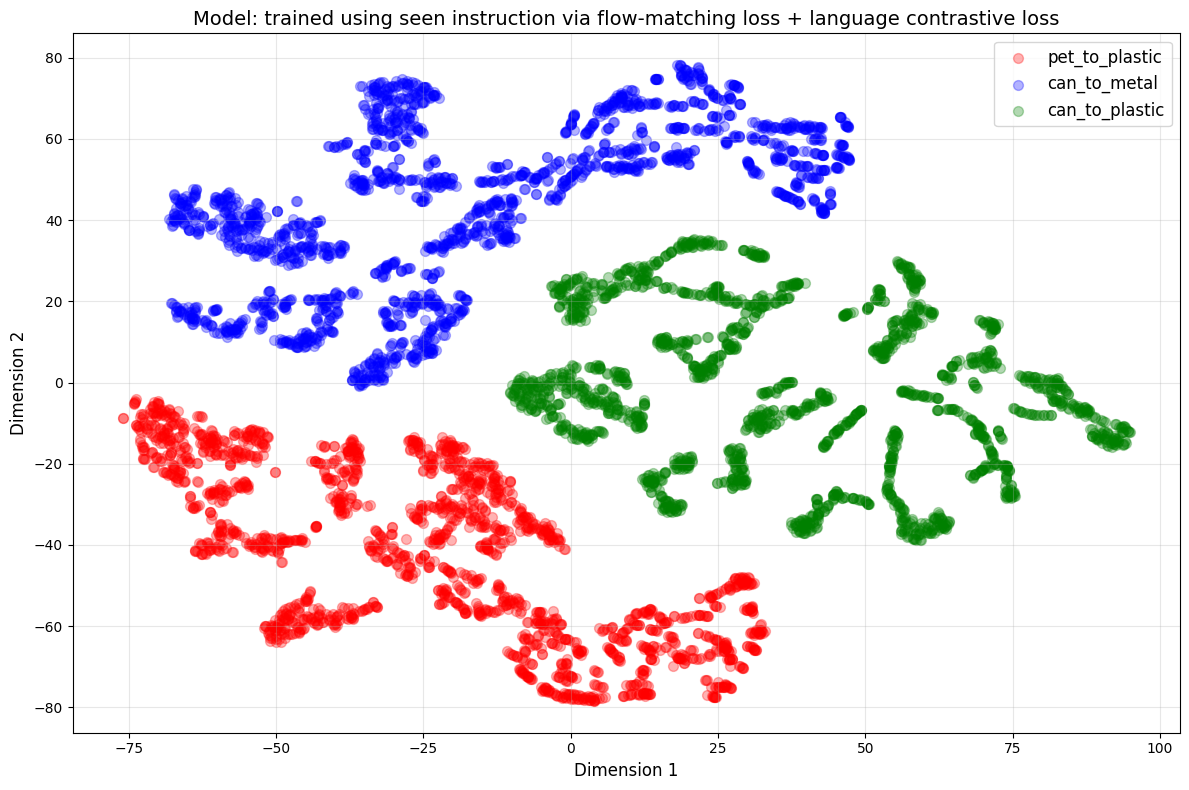

In [17]:
layer = "action_head.vl_self_attention.layer_3_step_0"

after_pickup_can_pnp_can_to_metal = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_fusion_action_head_single_vl_feature_ca_batch_for_info_nce_loss_1.0-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_red_can_pnp_can_to_metal.hdf5", 
    layer)
after_pickup_can_pnp_can_to_plastic = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_fusion_action_head_single_vl_feature_ca_batch_for_info_nce_loss_1.0-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_red_can_pnp_can_to_plastic.hdf5", 
    layer)

after_pickup_pet_pnp_pet_to_plastic = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_fusion_action_head_single_vl_feature_ca_batch_for_info_nce_loss_1.0-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_green_PET_pnp_pet_to_plastic.hdf5",
    layer
)


after_pickup_pet_pnp_pet_to_plastic = after_pickup_pet_pnp_pet_to_plastic[:, -1, :]
after_pickup_can_pnp_can_to_metal = after_pickup_can_pnp_can_to_metal[:, -1, :]
after_pickup_can_pnp_can_to_plastic = after_pickup_can_pnp_can_to_plastic[:, -1, :]

print("Loaded features")
print("Start t-SNE visualization")

# 1. 데이터 합치기
data = np.vstack([
    after_pickup_pet_pnp_pet_to_plastic,
    after_pickup_can_pnp_can_to_metal,
    after_pickup_can_pnp_can_to_plastic
])

# 2. 라벨 생성 (색상 구분용)
labels = np.array(
    ['pet_to_plastic'] * len(after_pickup_pet_pnp_pet_to_plastic) +
    ['can_to_metal'] * len(after_pickup_can_pnp_can_to_metal) +
    ['can_to_plastic'] * len(after_pickup_can_pnp_can_to_plastic)
)

# 3. 차원 축소 (방법 선택)
# 방법 A: t-SNE
reducer = TSNE(n_components=2, random_state=42, perplexity=30)
# 방법 B: UMAP (더 빠름)
# reducer = UMAP(n_components=2, random_state=42)
# 방법 C: PCA (가장 빠름)
# reducer = PCA(n_components=2)

embedded = reducer.fit_transform(data)

# 4. 시각화
plt.figure(figsize=(12, 8))
colors = {'pet_to_plastic': 'red', 'can_to_metal': 'blue', 'can_to_plastic': 'green'}

for label, color in colors.items():
    mask = labels == label
    plt.scatter(
        embedded[mask, 0], 
        embedded[mask, 1], 
        c=color, 
        label=label, 
        alpha=0.3, 
        s=50
    )

plt.legend(fontsize=12)
plt.xlabel('Dimension 1', fontsize=12)
plt.ylabel('Dimension 2', fontsize=12)
plt.title('Model: trained using seen instruction via flow-matching loss + language contrastive loss', fontsize=14)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# SVCCA analysis

In [19]:
from svcca import get_cca_similarity

In [18]:
layer = "action_head.vl_self_attention.layer_3_step_0"

after_pickup_can_pnp_can_to_metal = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_fusion_action_head_single_vl_feature_ca_batch_for_info_nce_loss_1.0-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_red_can_pnp_can_to_metal.hdf5", 
    layer)
after_pickup_can_pnp_can_to_plastic = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_fusion_action_head_single_vl_feature_ca_batch_for_info_nce_loss_1.0-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_red_can_pnp_can_to_plastic.hdf5", 
    layer)

after_pickup_pet_pnp_pet_to_plastic = load_feature(
    "/home/dongjun/gr00t_svcca/cached_features/model_gr00t_3_objs_separation_seen_fusion_action_head_single_vl_feature_ca_batch_for_info_nce_loss_1.0-checkpoint-10000_dataset_dongjun_251211_validation_after_pickup_green_PET_pnp_pet_to_plastic.hdf5",
    layer
)


after_pickup_pet_pnp_pet_to_plastic = after_pickup_pet_pnp_pet_to_plastic[:, -1, :].transpose(1, 0)
after_pickup_can_pnp_can_to_metal = after_pickup_can_pnp_can_to_metal[:, -1, :].transpose(1, 0)
after_pickup_can_pnp_can_to_plastic = after_pickup_can_pnp_can_to_plastic[:, -1, :].transpose(1, 0)

# comparison to negative
return_dict_2 = get_cca_similarity(
            after_pickup_can_pnp_can_to_metal, after_pickup_can_pnp_can_to_plastic, 
            threshold=0.98, 
            epsilon=1e-6, 
            compute_dirns=False,  # Set to False for faster computation if directions not needed
            device='cuda',
            use_svcca=False,  # Use true SVCCA from paper (SVD preprocessing)
            svd_components=None  # Auto: keep 98% variance
        )

NameError: name 'get_cca_similarity' is not defined

In [ ]:
# comparison to negative
return_dict_2 = get_cca_similarity(
            after_pickup_can_pnp_can_to_metal, after_pickup_can_pnp_can_to_plastic, 
            threshold=0.98, 
            epsilon=1e-6, 
            compute_dirns=False,  # Set to False for faster computation if directions not needed
            device='cuda',
            use_svcca=False,  # Use true SVCCA from paper (SVD preprocessing)
            svd_components=None  # Auto: keep 98% variance
        )

torch.Size([2048, 2048])


---

In [1]:
import os
import sys
# Disable flash attention to avoid ABI compatibility issues
# Add gr00t to path if needed
gr00t_path = "/home/dongjun/GR00T_Training"
if gr00t_path not in sys.path:
    sys.path.insert(0, gr00t_path)

import torch
from torch.utils.data import DataLoader
from transformers.feature_extraction_utils import BatchFeature
from gr00t.model.gr00t_n1 import GR00T_N1_5
from gr00t.model.transforms import build_eagle_processor
from gr00t.model.backbone.eagle_backbone import DEFAULT_EAGLE_PATH
from gr00t.experiment.data_config import DATA_CONFIG_MAP
from gr00t.data.schema import EmbodimentTag
from gr00t.data.dataset import LeRobotMixtureDataset, LeRobotSingleDataset
from gr00t.model.transforms import DefaultDataCollator
from gr00t.model.transforms import collate

/home/dongjun/miniconda/envs/gr00t/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2025-12-02 22:54:25.704447: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-12-02 22:54:25.748788: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-12-02 22:54:25.748824: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-12-02 22:54

In [2]:
# LLM attention weights extraction only
from typing import Dict, Optional
from collections import OrderedDict


class LLMAttentionExtractor:
    """
    Extract attention weights from LLM layers in GR00T model.
    """
    
    def __init__(self, model):
        """
        Args:
            model: GR00T_N1_5 model instance
        """
        self.model = model
        self.attentions = OrderedDict()
        self.hooks = []
        self.step_counters = {}
        
    def _create_attention_hook(self, name: str):
        """Create a forward hook for self_attn to extract attention weights."""
        def hook(module, input, output):
            if name not in self.step_counters:
                self.step_counters[name] = 0
            
            step_name = f"{name}_step_{self.step_counters[name]}"
            
            # output = (hidden_states, attention_weights, ...)
            self.attentions[step_name] = (output[0].detach(), output[1].detach())
            #if isinstance(output, tuple) and len(output) >= 2:
            #    attn_weights = output[1]
            #     if attn_weights is not None and isinstance(attn_weights, torch.Tensor):
            #        self.attentions[step_name] = attn_weights.detach()
            
            self.step_counters[name] += 1
        return hook
    
    def register_hooks(self):
        """Register forward hooks on LLM self_attn layers."""
        self.clear_hooks()
        self.attentions.clear()
        
        # Enable output_attentions
        self.model.backbone.eagle_model.language_model.config.output_attentions = True
        
        # Language Model layers
        llm_layers = self.model.backbone.eagle_model.language_model.model.layers
        for idx, layer in enumerate(llm_layers):
            hook_name = f"llm.layer_{idx}"
            hook = layer.self_attn.register_forward_hook(
                self._create_attention_hook(hook_name)
            )
            self.hooks.append(hook)
            print(f"Registered attention hook: {hook_name}")
        
        print(f"\nTotal hooks registered: {len(self.hooks)}")
        return self
    
    def clear_hooks(self):
        """Remove all registered hooks."""
        for hook in self.hooks:
            hook.remove()
        self.hooks.clear()
    
    def get_attentions(self) -> Dict[str, torch.Tensor]:
        """
        Get the extracted attention weights.
        
        Returns:
            Dict mapping layer names to attention weight tensors.
            Keys: "llm.layer_{idx}.attn_step_{step}"
            Shape: (batch_size, num_heads, seq_len, seq_len)
        """
        return self.attentions.copy()
    
    def clear_attentions(self):
        """Clear stored attention weights to free memory."""
        self.attentions.clear()
        self.step_counters.clear()
    
    def __enter__(self):
        """Context manager entry - registers hooks."""
        self.register_hooks()
        return self
    
    def __exit__(self, exc_type, exc_val, exc_tb):
        """Context manager exit - removes hooks."""
        self.clear_hooks()
        self.clear_attentions()



def extract_features_from_forward(model, inputs: dict) -> Dict[str, torch.Tensor]:
    """
    Convenience function to extract features during a single forward pass.
    
    Args:
        model: GR00T_N1_5 model instance
        inputs: Input dictionary for the model
        extractor: (Optional) Pre-initialized IntermediateFeatureExtractor instance.
                   If None, creates a new one (less efficient for repeated calls).
        
    Returns:
        Dictionary of intermediate features from all transformer layers
        
    Example (one-time extraction):
        ```python
        from feature_extraction_utils import extract_features_from_forward
        
        # Run model and extract features
        features = extract_features_from_forward(model, inputs)
        
        # Access features
        for layer_name, feature_tensor in features.items():
            print(f"{layer_name}: {feature_tensor.shape}")
        ```
    
    Example (repeated extraction - more efficient):
        ```python
        from feature_extraction_utils import IntermediateFeatureExtractor, extract_features_from_forward
        
        # Create extractor once and reuse
        extractor = IntermediateFeatureExtractor(model)
        extractor.register_hooks()  # Register hooks once
        
        for batch in dataloader:
            # Reuse extractor for each batch (more efficient)
            features = extract_features_from_forward(model, batch, extractor=extractor)
            # Process features...
            extractor.clear_features()  # Clear to free memory
        
        extractor.clear_hooks()  # Clean up when done
        ```
    """
    extractor = LLMAttentionExtractor(model)
    
    with extractor:
        # Run forward pass
        _ = model.get_action(inputs)
        # Get extracted features
        features = extractor.get_attentions()
    
    return features

In [3]:
# load model and processor
model_seen = GR00T_N1_5.from_pretrained(
        pretrained_model_name_or_path="/home/dongjun/checkpoints/gr00t_3_objs_separation_seen_depth_1_fullft/checkpoint-10000",
        tune_llm=True,  # backbone's LLM
        tune_visual=True,  # backbone's vision tower
        tune_projector=False,  # action head's projector
        tune_diffusion_model=False,  # action head's DiT
        torch_dtype=torch.bfloat16,
    )
model = model_seen.to("cuda")
model_seen.eval()  # Set to evaluation mode (disable dropout, etc.)
    
# Get EAGLE VLM backbone
#eagle_model = model.backbone.eagle_mode

Loading pretrained dual brain from /home/dongjun/checkpoints/gr00t_3_objs_separation_seen_depth_1_fullft/checkpoint-10000
Tune backbone vision tower: True
Tune backbone LLM: True
Tune action head projector: False
Tune action head DiT: False
Model not found or avail in the huggingface hub. Loading from local path: /home/dongjun/checkpoints/gr00t_3_objs_separation_seen_depth_1_fullft/checkpoint-10000
Tune backbone llm: False
Tune backbone visual: True
Total number of DiT parameters:  550386688
Total number of SelfAttentionTransformer parameters:  201433088
Tune action head projector: True
Tune action head diffusion model: True


Loading checkpoint shards: 100%|██████████| 2/2 [00:16<00:00,  8.20s/it]


Tune backbone llm: True
Tune backbone visual: True
Tune action head projector: False
Tune action head diffusion model: False
Action head trainable parameter: future_tokens.weight
Action head trainable parameter: vlln.weight
Action head trainable parameter: vlln.bias
Action head trainable parameter: vl_self_attention.transformer_blocks.0.norm1.weight
Action head trainable parameter: vl_self_attention.transformer_blocks.0.norm1.bias
Action head trainable parameter: vl_self_attention.transformer_blocks.0.attn1.to_q.weight
Action head trainable parameter: vl_self_attention.transformer_blocks.0.attn1.to_q.bias
Action head trainable parameter: vl_self_attention.transformer_blocks.0.attn1.to_k.weight
Action head trainable parameter: vl_self_attention.transformer_blocks.0.attn1.to_k.bias
Action head trainable parameter: vl_self_attention.transformer_blocks.0.attn1.to_v.weight
Action head trainable parameter: vl_self_attention.transformer_blocks.0.attn1.to_v.bias
Action head trainable parameter

GR00T_N1_5(
  (backbone): EagleBackbone(
    (eagle_model): Eagle2_5_VLForConditionalGeneration(
      (vision_model): SiglipVisionModel(
        (vision_model): SiglipVisionTransformer(
          (embeddings): SiglipVisionEmbeddings(
            (patch_embedding): Conv2d(3, 1152, kernel_size=(14, 14), stride=(14, 14), padding=valid)
            (position_embedding): Embedding(256, 1152)
          )
          (encoder): SiglipEncoder(
            (layers): ModuleList(
              (0-26): 27 x SiglipEncoderLayer(
                (layer_norm1): LayerNorm((1152,), eps=1e-06, elementwise_affine=True)
                (self_attn): SiglipAttention(
                  (k_proj): Linear(in_features=1152, out_features=1152, bias=True)
                  (v_proj): Linear(in_features=1152, out_features=1152, bias=True)
                  (q_proj): Linear(in_features=1152, out_features=1152, bias=True)
                  (out_proj): Linear(in_features=1152, out_features=1152, bias=True)
              

In [4]:
  # Get eagle processor
eagle_processor = build_eagle_processor(
'/home/dongjun/GR00T_Training/gr00t/model/backbone/eagle2_hg_model',
)
eagle_processor.tokenizer.padding_side = "left"

In [5]:
# get dataset
data_config_cls = DATA_CONFIG_MAP["bimanual_piper"]
modality_configs = data_config_cls.modality_config()
transforms = data_config_cls.transform()
embodiment_tag = EmbodimentTag("new_embodiment")

train_dataset = LeRobotSingleDataset(
    dataset_path="/home/dongjun/gr00t_svcca/dataset/segmented_depth_1_trash_separation_3_objs_unseen_251126_pnp_coke_to_plastic_place_split",
    modality_configs=modality_configs,
    transforms=transforms,
    embodiment_tag=embodiment_tag,  # This will override the dataset's embodiment tag to "new_embodiment"
    video_backend="torchvision_av",
    )

Initialized dataset segmented_depth_1_trash_separation_3_objs_unseen_251126_pnp_coke_to_plastic_place_split with EmbodimentTag.NEW_EMBODIMENT


In [6]:
sample = next(iter(train_dataset))
inputs = collate([sample], eagle_processor)

In [7]:
out = extract_features_from_forward(model_seen, inputs)

Registered attention hook: llm.layer_0
Registered attention hook: llm.layer_1
Registered attention hook: llm.layer_2
Registered attention hook: llm.layer_3
Registered attention hook: llm.layer_4
Registered attention hook: llm.layer_5
Registered attention hook: llm.layer_6
Registered attention hook: llm.layer_7
Registered attention hook: llm.layer_8
Registered attention hook: llm.layer_9
Registered attention hook: llm.layer_10
Registered attention hook: llm.layer_11

Total hooks registered: 12


In [8]:
attn_maps = []
for v in out.values():
    attn_maps.append(v[1])

In [10]:
import torch

def attention_rollout_last_token(attn_layers, add_residual=True):
    """
    Compute attention rollout for the final token's representation.

    Args:
        attn_layers:
            - Tensor of shape (L, 1, H, S, S) or (L, H, S, S), or
            - list of Tensors, each of shape (1, H, S, S)
        add_residual: whether to mix attention with identity (residual connection).

    Returns:
        last_token_importance: Tensor of shape (S,)
            Rollout-based importance of each input token for the final token
            in the last layer.
    """
    # Normalize to a single tensor of shape (L, H, S, S)
    if isinstance(attn_layers, torch.Tensor):
        if attn_layers.dim() == 5:
            # (L, 1, H, S, S) -> (L, H, S, S)
            attn = attn_layers[:, 0]
        elif attn_layers.dim() == 4:
            # already (L, H, S, S)
            attn = attn_layers
        else:
            raise ValueError(f"Unexpected attn_layers shape: {attn_layers.shape}")
    else:
        # assume list of (1, H, S, S)
        attn = torch.stack([a.squeeze(0) for a in attn_layers], dim=0)

    L, H, S, _ = attn.shape

    # 1) Average over heads: (L, S, S)
    attn_head_avg = attn.mean(dim=1)

    # 2) Add residual by mixing with identity
    eye = torch.eye(S, device=attn_head_avg.device, dtype=attn_head_avg.dtype)
    if add_residual:
        # A_l = 0.5 * W_l + 0.5 * I
        A = 0.5 * attn_head_avg + 0.5 * eye.unsqueeze(0)
    else:
        A = attn_head_avg

    # 3) Rollout: R_0 = I, R_l = A_l @ R_{l-1}
    rollout = eye.clone()  # (S, S)
    for l in range(L):
        rollout = A[l] @ rollout  # (S, S)

    # 4) Take the row for the final token index (S - 1)
    last_token_idx = S - 1
    last_token_importance = rollout[last_token_idx]  # (S,)

    return rollout

In [11]:
rollout_result = attention_rollout_last_token(attn_maps)

In [15]:
sample['eagle_content']['text_list'][0]

'<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\n<image-1><image-2><image-3>pick up the red coke can and put it inside the plastic trash bin.<|im_end|>\n<|im_start|>assistant\n'

In [18]:
torch.where(inputs['eagle_input_ids'] == 151671)

(tensor([0, 0, 0]), tensor([276, 539, 802]))

<BarContainer object of 822 artists>

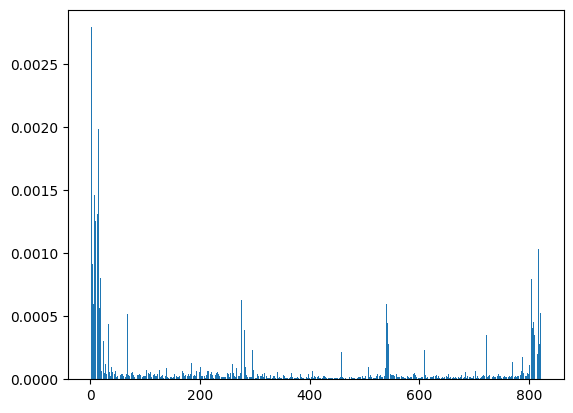

In [14]:
import matplotlib.pyplot as plt

plt.bar(range(1, len(rollout_result[822].cpu().float().numpy())), rollout_result[822,1:].cpu().float().numpy())

In [14]:
out['llm.layer_0.attn_step_0'].shape

torch.Size([1, 823, 2048])

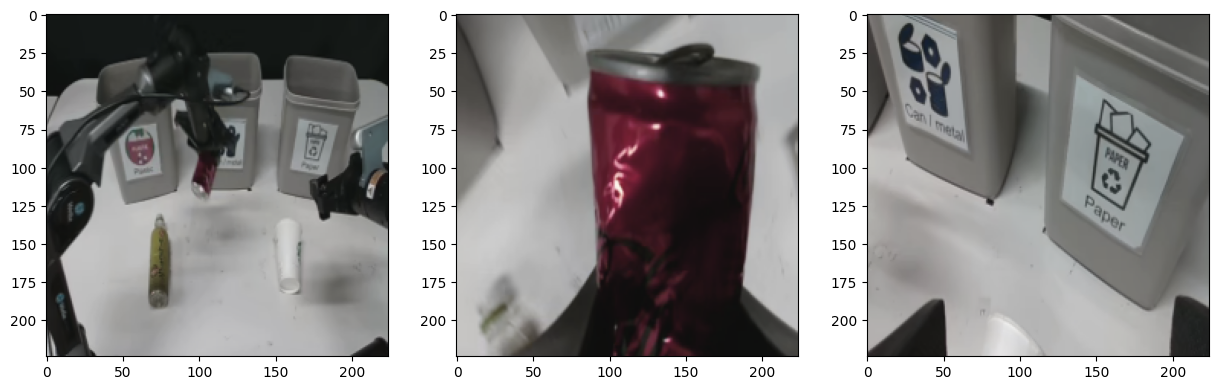

In [17]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 5))
plt.subplot(1, 3, 1)
plt.imshow(sample['eagle_content']['image_inputs'][0])
plt.subplot(1, 3, 2)
plt.imshow(sample['eagle_content']['image_inputs'][1])
plt.subplot(1, 3, 3)
plt.imshow(sample['eagle_content']['image_inputs'][2])
plt.show()

# Q. Does the final hidden state become different according to slight change in language instruction?

In [51]:
sample['eagle_content']['text_list'][0]

'<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\n<image-1><image-2><image-3>pick up the red coke can and put it inside the plastic trash bin.<|im_end|>\n<|im_start|>assistant\n'

In [ ]:
sample = next(iter(train_dataset))

sample_1 = sample.copy()
sample_2 = sample.copy()
sample_2['eagle_content']['text_list'][0] = "<|im_start|>system\nYou are a helpful assistant.<|im_end|>\n<|im_start|>user\n<image-1><image-2><image-3>pick up the red coke can and put it inside the metal trash bin.<|im_end|>\n<|im_start|>assistant\n" 
inputs = collate([sample], eagle_processor)

In [42]:
out = extract_features_from_forward(model, inputs)

Registered attention hook: llm.layer_0
Registered attention hook: llm.layer_1
Registered attention hook: llm.layer_2
Registered attention hook: llm.layer_3
Registered attention hook: llm.layer_4
Registered attention hook: llm.layer_5
Registered attention hook: llm.layer_6
Registered attention hook: llm.layer_7
Registered attention hook: llm.layer_8
Registered attention hook: llm.layer_9
Registered attention hook: llm.layer_10
Registered attention hook: llm.layer_11

Total hooks registered: 12


In [50]:
out['llm.layer_11_step_0'][0]

tensor([[[ 0.1270,  0.1406, -0.1177,  ...,  0.2734,  0.0483, -0.0098],
         [ 0.2227,  0.6289, -0.2773,  ..., -0.3887,  0.4434,  0.3984],
         [ 0.1318,  0.3809, -0.3496,  ..., -0.0400,  0.2812,  0.1689],
         ...,
         [ 0.6914,  1.7500, -0.6523,  ..., -0.3320,  0.6328, -0.3535],
         [-0.0299,  0.9805, -0.1621,  ..., -0.3535,  0.7148, -0.2578],
         [-0.0869,  0.5195, -0.3945,  ..., -0.0393,  0.3730, -0.3145]]],
       device='cuda:0', dtype=torch.bfloat16)